In [1]:
# allow notebook to find reddit murmur
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# imports
%matplotlib inline
from reddit_murmur import reddit_murmur as rm
import matplotlib.pyplot as plt
import datetime

In [4]:
subreddit_labels=['pics', 'politics']
r = rm.Reddit(subreddit_labels)

# NOTE: streams will run as long as reddit object is in context
r.start_streams()

pics comment count since 2018-01-21 13:51:28.964795: 594
{'start': datetime.datetime(2018, 1, 21, 13, 49, 42, 565925), 'intervals': 60, 'end': datetime.datetime(2018, 1, 21, 14, 4, 42, 565925), 'timeseries': [7L, 16L, 21L, 12L, 12L, 13L, 11L, 12L, 12L, 4L, 14L, 5L, 10L, 14L, 8L, 11L, 5L, 18L, 14L, 13L, 9L, 12L, 14L, 10L, 7L, 11L, 5L, 5L, 16L, 4L, 9L, 12L, 1L, 8L, 10L, 10L, 9L, 13L, 9L, 11L, 7L, 11L, 11L, 14L, 9L, 9L, 9L, 11L, 16L, 11L, 15L, 7L, 10L, 10L, 13L, 13L, 8L, 8L, 9L, 4L], 'delta': datetime.timedelta(0, 15)}


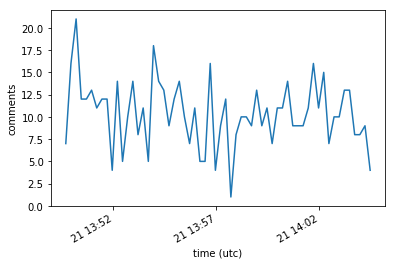

In [38]:
# Comments are now being inserted into your database.
# Thread object
pics_subreddit = r.subreddits['pics']
# Data Access Object (interface to database)
pics_subreddit_dao = r.subreddits_dao['pics']

# See how many comments the thread has ingested
print '%s comment count since %s: %d' % \
    (pics_subreddit.name, pics_subreddit.created_at, pics_subreddit.comments)

# Lets use the dao to grab a 15m timeseries of this subreddit's comments
pics_timeseries = pics_subreddit_dao.traffic_timeseries('15m')
print pics_timeseries

# Now lets graph the timeseries
time_x = [pics_timeseries['start'] + datetime.timedelta(
    seconds=i * pics_timeseries['delta'].seconds) for i in range(pics_timeseries['intervals'])]
comments_y = pics_timeseries['timeseries']
plt.plot(time_x, comments_y)
plt.ylabel('comments')
plt.xlabel('time (utc)')
plt.gcf().autofmt_xdate()
plt.show()